In [2]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import ndimage, misc
import re
import pandas as pd


In [3]:
img = imread('stanford-dogs-dataset/Images/n02085620-Chihuahua/n02085620_10074.jpg')

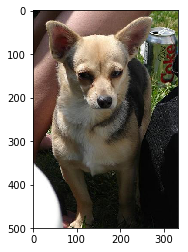

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [12]:
img.reshape(250*250*3)

array([11,  9, 14, ..., 16, 16, 16], dtype=uint8)

In [5]:
mean=[256*0.485, 256*0.456, 256*0.406]
std=[256*0.229,256*0.224, 256*0.225]
images = []
for root, dirnames, filenames in os.walk("stanford-dogs-dataset/Images/n02085620-Chihuahua"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = misc.imresize(image, (250, 250))
            images.append(image_resized)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


In [6]:
for i in range(len(images)):
    images[i] = (images[i]-mean)/std
    images[i] = images[i].reshape(250*250*3)

In [7]:
df = pd.DataFrame(np.stack(images))

In [8]:
df['label'] =1

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,187491,187492,187493,187494,187495,187496,187497,187498,187499,label
0,-0.531523,-0.239537,-0.016250,-0.480349,-0.187221,0.018472,-0.480349,-0.169782,-0.016250,-0.514465,...,0.065502,0.684710,1.320556,-0.531523,0.074358,0.712917,-0.429176,0.178990,0.817083,1
1,-1.947325,-1.931083,-1.682917,-1.947325,-1.931083,-1.682917,-1.947325,-1.931083,-1.682917,-1.947325,...,1.208379,1.295061,1.615694,1.208379,1.329939,1.633056,1.191321,1.312500,1.615694,1
2,0.253139,0.649833,1.199028,-0.616812,-0.100028,0.487222,-0.395060,0.213867,0.799722,0.474891,...,-1.043259,-1.059152,-0.728056,-0.889738,-0.937081,-0.675972,-0.804449,-0.849888,-0.606528,1
3,-0.633870,-0.291853,-0.398194,-0.633870,-0.291853,-0.398194,-0.650928,-0.309291,-0.415556,-0.616812,...,-0.156250,0.231306,0.539306,0.270197,0.667271,0.990694,0.850164,1.260184,1.563611,1
4,-0.446234,-0.448800,-0.537083,-0.309771,-0.309291,-0.415556,-0.190366,-0.187221,-0.294028,-0.088019,...,-0.139192,-0.134905,-0.189861,-0.224481,-0.239537,-0.224583,-0.395060,-0.413923,-0.380833,1


In [10]:

images = []
for root, dirnames, filenames in os.walk("stanford-dogs-dataset/Images/n02107312-miniature_pinscher"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = misc.imresize(image, (250, 250))
            images.append(image_resized)

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [11]:
for i in range(len(images)):
    images[i] = (images[i]-mean)/std
    images[i] = images[i].reshape(250*250*3)

In [12]:
df2 = pd.DataFrame(np.stack(images))

In [13]:
df2['label'] = 0
df = df.append(df2)

In [14]:
df.index = [i for i in range(336)]

In [73]:
df.to_csv('dog1.csv')

In [16]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA()


In [85]:
new_x = pca.fit_transform(df.drop(['label'],axis=1))

In [86]:
df3 = pd.DataFrame(new_x)

In [87]:
df3['label']=df['label']

In [89]:
df3.to_csv('dog2.csv')

In [73]:
from sklearn import model_selection, neighbors, linear_model

In [74]:
logit_loss = {i:[] for i in range(1,11)}
knn_loss   = {i:[] for i in range(1,11)}
knn_pca_loss = {i:[] for i in range(1,11)}
x = df.drop(['label'],axis=1)
y = df['label']
kf = model_selection.KFold(n_splits=10,shuffle=True,random_state = 19)
j = 0
for train_index, test_index in kf.split(df):
    j+=1
    x_train, y_train = x.iloc[train_index], y.iloc[train_index]
    x_test, y_test   = x.iloc[test_index], y.iloc[test_index]
    print('round {}'.format(j))
    for i in range(1,11):
        pca = PCA(n_components = 3*i)
        pca.fit(x_train)
        pca_train = pca.transform(x_train)
        pca_test  = pca.transform(x_test)
        knn       = neighbors.KNeighborsClassifier(n_neighbors = 5*i)
        logit     = linear_model.LogisticRegression(solver='lbfgs')
        knn.fit(x_train, y_train)
        logit.fit(pca_train, y_train)
        knn_loss[i].append(knn.score(x_test,y_test))
        logit_loss[i].append(logit.score(pca_test,y_test))
        knn.fit(pca_train,y_train)
        knn_pca_loss[i].append(knn.score(pca_test,y_test))
        print('{}'.format(i),
              ' KNN Loss {}'.format(round(np.mean(knn_loss[i]),2)),
              'Logit loss {}'.format(round(np.mean(logit_loss[i]),2)),
              'KNN with PCA loss {}'.format(round(np.mean(knn_pca_loss[i]),2)))
        

round 1
1  KNN Loss 0.5 Logit loss 0.47 KNN with PCA loss 0.47
2  KNN Loss 0.56 Logit loss 0.53 KNN with PCA loss 0.59
3  KNN Loss 0.65 Logit loss 0.53 KNN with PCA loss 0.5
4  KNN Loss 0.71 Logit loss 0.5 KNN with PCA loss 0.62
5  KNN Loss 0.68 Logit loss 0.5 KNN with PCA loss 0.65
6  KNN Loss 0.59 Logit loss 0.53 KNN with PCA loss 0.56
7  KNN Loss 0.65 Logit loss 0.5 KNN with PCA loss 0.53
8  KNN Loss 0.59 Logit loss 0.5 KNN with PCA loss 0.53
9  KNN Loss 0.59 Logit loss 0.56 KNN with PCA loss 0.59
10  KNN Loss 0.56 Logit loss 0.56 KNN with PCA loss 0.56
round 2
1  KNN Loss 0.59 Logit loss 0.54 KNN with PCA loss 0.5
2  KNN Loss 0.57 Logit loss 0.65 KNN with PCA loss 0.62
3  KNN Loss 0.66 Logit loss 0.63 KNN with PCA loss 0.54
4  KNN Loss 0.66 Logit loss 0.63 KNN with PCA loss 0.62
5  KNN Loss 0.66 Logit loss 0.63 KNN with PCA loss 0.63
6  KNN Loss 0.63 Logit loss 0.66 KNN with PCA loss 0.59
7  KNN Loss 0.68 Logit loss 0.65 KNN with PCA loss 0.63
8  KNN Loss 0.65 Logit loss 0.65 KNN w

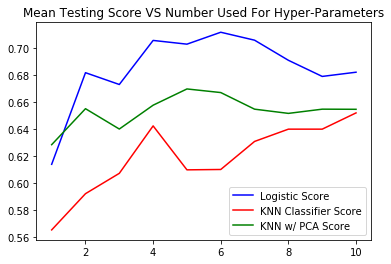

In [75]:
plt.plot([i for i in range(1,11)],[np.mean(logit_loss[i]) for i in range(1,11)],c='b')
plt.plot([i for i in range(1,11)],[np.mean(knn_loss[i]) for i in range(1,11)],c='r')
plt.plot([i for i in range(1,11)],[np.mean(knn_pca_loss[i]) for i in range(1,11)],c='g')
plt.title('Mean Testing Score VS Number Used For Hyper-Parameters')
plt.legend(('Logistic Score','KNN Classifier Score','KNN w/ PCA Score'))
plt.style.use('tableau-colorblind10')
plt.savefig('modelscores.png')
plt.show()

In [19]:
x = df.drop(['label'],axis=1)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pca = PCA(n_components=3)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
x_prime = pca.transform(x)

In [55]:
pca_im1 = x_prime.dot(pca.components_)[0].reshape(250,250,3)


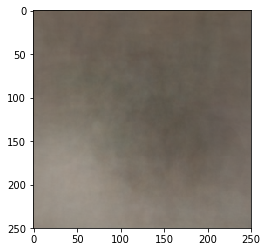

In [56]:
plt.imshow((std*pca_im1+mean).astype(int))
plt.show()

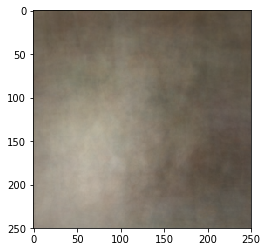

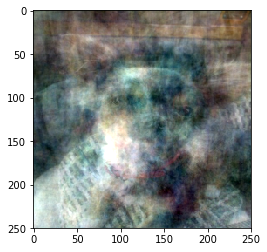

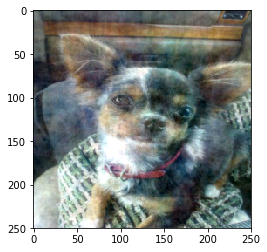

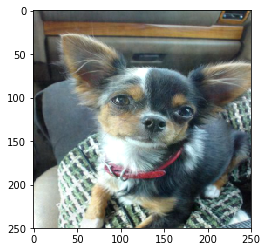

In [72]:
for i in range(4,330,90):
    pca = PCA(n_components=i)
    pca.fit(x)
    x_prime = pca.transform(x)
    pca_im1 = x_prime.dot(pca.components_)[0].reshape(250,250,3)
    plt.imshow((std*pca_im1+mean).astype(int))
    plt.savefig('dimension{}.png'.format(i))
    plt.show()

,0,1,2,3,4,5,6,7,8,9,...,187490,187491,187492,187493,187494,187495,187496,187497,187498,187499
0,-0.531523,-0.239537,-0.016250,-0.480349,-0.187221,0.018472,-0.480349,-0.169782,-0.016250,-0.514465,...,1.598333,0.065502,0.684710,1.320556,-0.531523,0.074358,0.712917,-0.429176,0.178990,0.817083
1,-1.947325,-1.931083,-1.682917,-1.947325,-1.931083,-1.682917,-1.947325,-1.931083,-1.682917,-1.947325,...,1.563611,1.208379,1.295061,1.615694,1.208379,1.329939,1.633056,1.191321,1.312500,1.615694
2,0.253139,0.649833,1.199028,-0.616812,-0.100028,0.487222,-0.395060,0.213867,0.799722,0.474891,...,-0.728056,-1.043259,-1.059152,-0.728056,-0.889738,-0.937081,-0.675972,-0.804449,-0.849888,-0.606528
3,-0.633870,-0.291853,-0.398194,-0.633870,-0.291853,-0.398194,-0.650928,-0.309291,-0.415556,-0.616812,...,0.244167,-0.156250,0.231306,0.539306,0.270197,0.667271,0.990694,0.850164,1.260184,1.563611
4,-0.446234,-0.448800,-0.537083,-0.309771,-0.309291,-0.415556,-0.190366,-0.187221,-0.294028,-0.088019,...,-0.137778,-0.139192,-0.134905,-0.189861,-0.224481,-0.239537,-0.224583,-0.395060,-0.413923,-0.380833
5,-0.395060,-0.518555,-0.519722,-0.360944,-0.483677,-0.485000,-0.292713,-0.413923,-0.415556,-0.258597,...,0.903889,0.236081,0.301060,0.799722,0.219023,0.318499,0.765000,0.236081,0.335937,0.782361
6,-0.105076,1.870536,-0.137778,-0.173308,1.835658,-0.155139,-0.156250,1.905413,-0.050972,-0.088019,...,-1.735000,-2.117904,-1.843890,-1.804444,-2.100846,-1.774135,-1.787083,-2.066730,-1.547433,-1.769722
7,0.833106,0.946289,1.077500,0.935453,0.911412,0.938611,0.713701,0.492885,0.383056,-0.258597,...,-0.311389,0.662527,0.178990,-0.224583,0.713701,0.231306,-0.172500,0.645469,0.161551,-0.241944
8,0.747817,-0.134905,-1.057917,0.884279,0.004604,-0.936389,0.781932,-0.100028,-1.023194,0.662527,...,-1.353056,-0.719159,-1.285854,-1.422500,-0.838564,-1.338170,-1.457222,-0.906796,-1.355608,-1.439861
9,0.969569,1.120675,1.390000,0.901337,1.050921,1.303194,0.816048,0.963728,1.146944,0.645469,...,-1.266250,-1.606168,-1.495117,-1.266250,-1.623226,-1.495117,-1.283611,-1.623226,-1.495117,-1.283611
